# Problem Statement

Bankruptcy prediction is the art of predicting bankruptcy and various measures of financial distress of public firms.
The problem statement is to develop a prediction model which will predict whether a company can go bankrupt or not.
This will help the company to take appropriate decisions.We have have got certain paramertes which govern the prediction.
This is a classification problem as the motive of the problem statement is to predict a binary solution whether
the comapny goes bankrupt or not. 



In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Importing the data set
DF=pd.read_csv('bankruptcy-prevention.csv', delimiter=';')
DF

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
#Lets drop the target column that is "class"
df=DF.drop([' class'], axis=1)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


# 1) Exploratory Data Analysis

In [4]:
#Describing the data set
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns.tolist()

['industrial_risk',
 ' management_risk',
 ' financial_flexibility',
 ' credibility',
 ' competitiveness',
 ' operating_risk']

All the columns are required and are the parmaetrs which predict the classification.

In [6]:
#Checking invalid records
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
dtype: int64

No Null values and there are no invalid records in the data set

In [7]:
#Missing value detection and imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
dtypes: float64(6)
memory usage: 11.8 KB


# Outliers

As the given data set has categorical values and nothing to be excluded.

# Converting the values to the actual refered meaning for better undertanding

In [8]:
categ= df.iloc[:,0:6].replace({0:'Low',0.5:'Medium',1:'High'})
categ

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,Medium,High,Low,Low,Low,Medium
1,Low,High,Low,Low,Low,High
2,High,Low,Low,Low,Low,High
3,Medium,Low,Low,Medium,Low,High
4,High,High,Low,Low,Low,High
...,...,...,...,...,...,...
245,Low,High,High,High,High,High
246,High,High,Medium,High,High,Low
247,Low,High,High,Medium,Medium,Low
248,High,Low,Medium,High,Medium,Low


In [9]:
#Correlation
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


<Axes: >

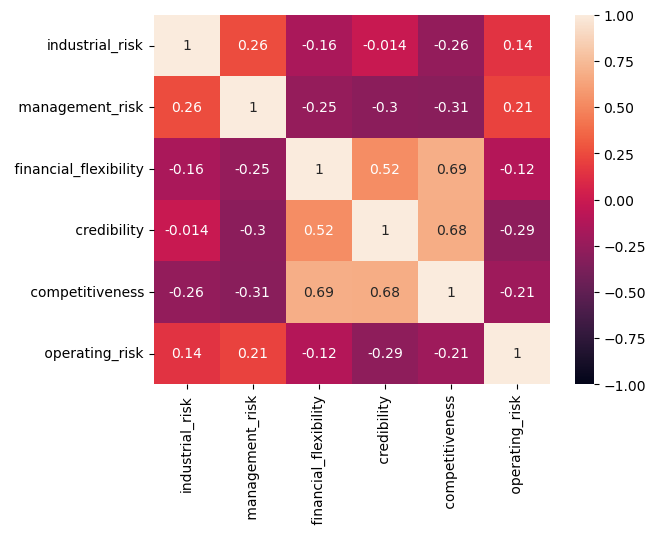

In [10]:
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)

# Data Visualization

<Axes: xlabel=' class', ylabel='count'>

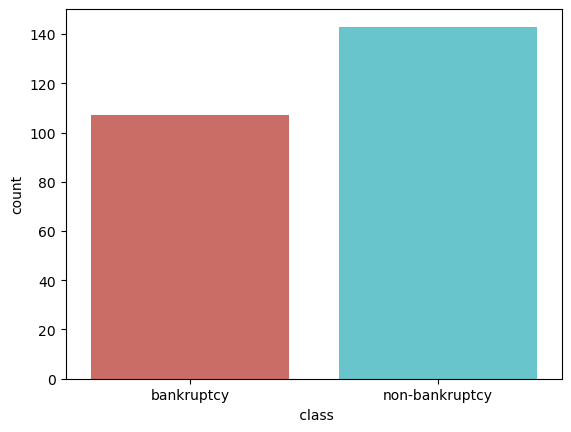

In [11]:
sns.countplot(x = ' class', data = DF, palette = 'hls')

<Axes: xlabel='industrial_risk'>

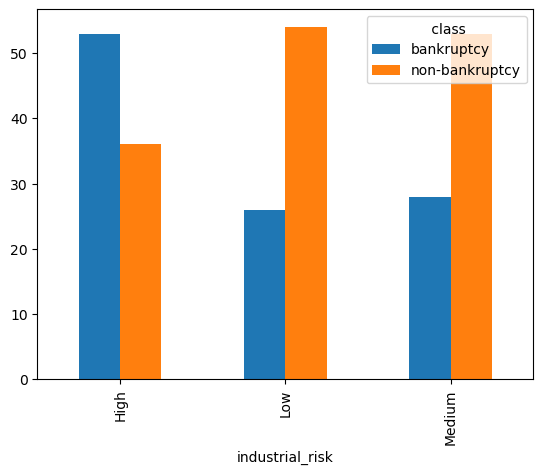

In [12]:
pd.crosstab(categ.industrial_risk,DF[' class']).plot(kind='bar')

<Axes: xlabel=' management_risk'>

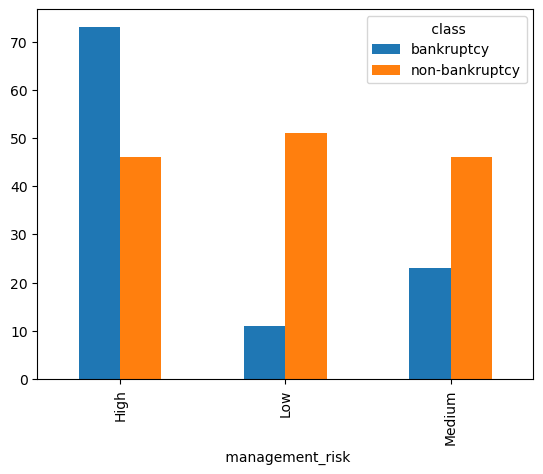

In [13]:
pd.crosstab(categ[' management_risk'],DF[' class']).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

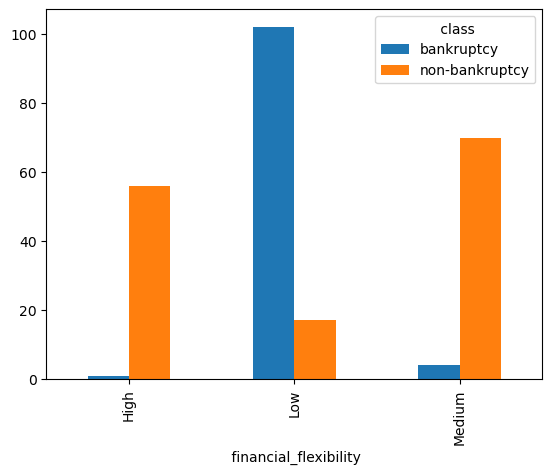

In [14]:
pd.crosstab(categ[' financial_flexibility'],DF[' class']).plot(kind='bar')

<Axes: xlabel=' operating_risk'>

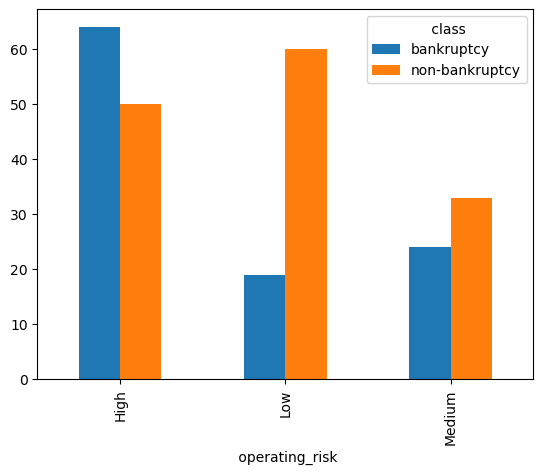

In [15]:
pd.crosstab( categ[' operating_risk'],DF[' class']).plot(kind='bar')

<Axes: xlabel=' credibility'>

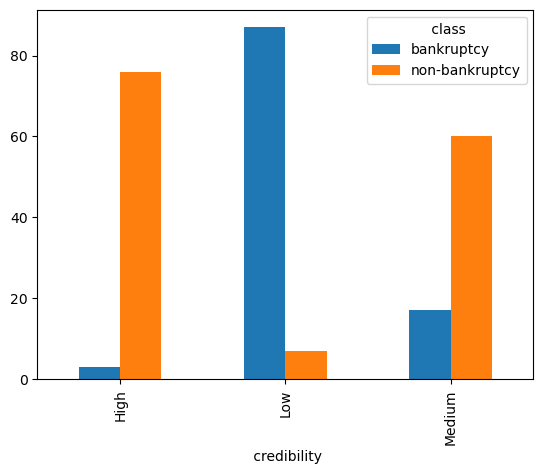

In [16]:
pd.crosstab(categ[' credibility'],DF[' class']).plot(kind='bar')

<Axes: xlabel=' competitiveness'>

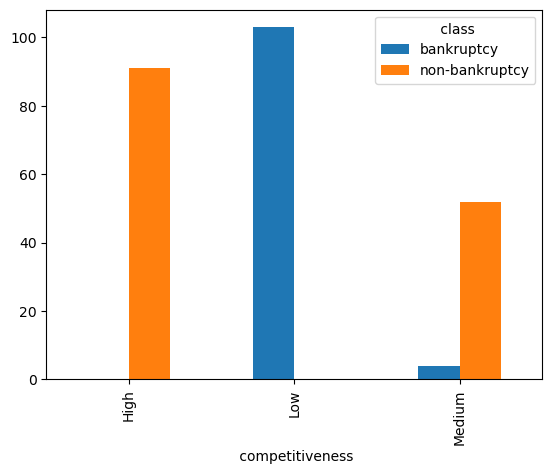

In [17]:
pd.crosstab(categ[' competitiveness'],DF[' class']).plot(kind='bar')

# Feature Engineering

# Chi2 test

In [18]:
from sklearn.feature_selection import chi2
x=DF.drop(columns=[' class'],axis=1)
y=DF[' class']

In [19]:
chi_scores=chi2(x,y)

In [20]:
chi_scores

(array([ 4.22529844,  9.40719007, 60.23724218, 52.30725081, 82.1862519 ,
         6.4581291 ]),
 array([3.98256148e-02, 2.16136200e-03, 8.40860779e-15, 4.74618793e-13,
        1.23848345e-19, 1.10445872e-02]))

<Axes: >

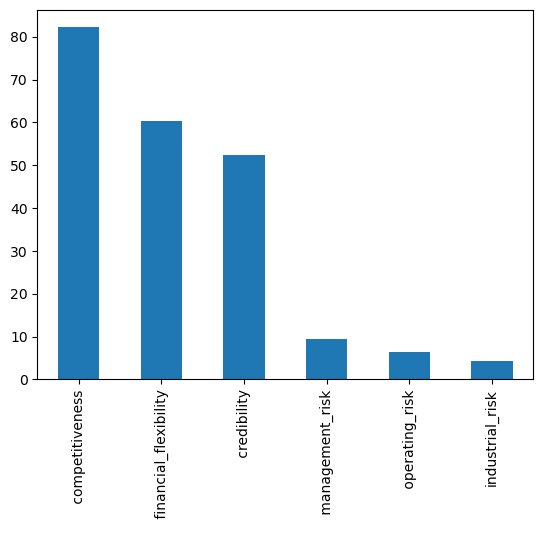

In [21]:
chi_values=pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

Higher the chi value higher is the importance of the feature.

From the chi2 test we can conclude that competitiveness, financial flexibility, credibility are the features which has more importance in predicting the class


# Recursive Feature Elimination

In [22]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [23]:
x=DF.drop(columns=[' class'],axis=1)
y=DF[' class']

In [24]:
rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=3)
rfe.fit(x,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [25]:
for i, col in zip(range(x.shape[1]), x.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

industrial_risk selected=False rank=4
 management_risk selected=False rank=3
 financial_flexibility selected=False rank=2
 credibility selected=True rank=1
 competitiveness selected=True rank=1
 operating_risk selected=True rank=1


Higher the rank, higher is the importance of the feature.

From the RFE test we can conclude that competitiveness, financial flexibility, credibility are the features which has more importance in predicting the class

Hence comparing both the feature selection test we consider 'competitiveness, financial flexibility, credibility' has more importance in predicting the 'class'  and we drop other columns.

# Model Building

In [26]:
#Converting the class column to numerical
df1= DF.iloc[:,:7].replace({'bankruptcy':0,'non-bankruptcy':1})
df1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [27]:
#Considering only competitiveness, financial flexibility, credibility as it has more importance in predicting the 'class'and droppping other columns

In [28]:
df=df1.drop(['industrial_risk',' management_risk',' operating_risk'],axis=1)
df

,financial_flexibility,credibility,competitiveness,class
0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.0,0.5,0.0,0
4,0.0,0.0,0.0,0
...,...,...,...,...
245,1.0,1.0,1.0,1
246,0.5,1.0,1.0,1
247,1.0,0.5,0.5,1
248,0.5,1.0,0.5,1


# Splitting the Data into train and test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x=df.drop([' class'],axis=1)
x

,financial_flexibility,credibility,competitiveness
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.5,0.0
4,0.0,0.0,0.0
...,...,...,...
245,1.0,1.0,1.0
246,0.5,1.0,1.0
247,1.0,0.5,0.5
248,0.5,1.0,0.5


In [31]:
y=df[[' class']]
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
245,1
246,1
247,1
248,1


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=1)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (200, 3)
Shape of X_test  :  (50, 3)
Shape of y_train :  (200, 1)
Shape of y_test  :  (50, 1)


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [34]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
logistic_model.coef_

array([[2.46169655, 2.31992672, 3.970927  ]])

In [36]:
#Train Accuracy
y_pred_train=logistic_model.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.995

In [37]:
#Test Accuracy
y_pred_test = logistic_model.predict(x_test)
accuracy_score(y_test,y_pred_test)

1.0

In [38]:
print('Training set score : {:.2f}%'.format(logistic_model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(logistic_model.score(x_test, y_test)*100))

Training set score : 99.50%
Test set score     : 100.00%


# KNN Model

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
num_folds = 10
kfold = KFold(n_splits=10)

In [41]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [42]:
#Predicting on Train Data
preds_train = model.predict(x_train)
accuracy_score(y_train,preds_train)

0.995

In [43]:
#Predicting on test data
preds_test = model.predict(x_test) # predicting on test data set 
pd.Series(preds_test).value_counts() # getting the count of each category

1    26
0    24
Name: count, dtype: int64

In [44]:
# Accuracy
accuracy_score(y_test,preds_test)

1.0

In [45]:
print('Training set score : {:.2f}%'.format(model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score : 99.50%
Test set score     : 100.00%


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.tree import plot_tree

In [47]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [48]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() #getting the count of each category

1    26
0    24
Name: count, dtype: int64

In [49]:
#Train Accuracy 
model.score(x_train,y_train)

0.995

In [50]:
#Test Accuracy
model.score(x_test,y_test)

1.0

In [51]:
print('Training set score : {:.2f}%'.format(model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score : 99.50%
Test set score     : 100.00%


# SVM Model

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

kernel='linear'

In [53]:
model_linear = SVC(kernel = "linear",random_state=40, gamma=0.1, C=1.0)
model_linear.fit(x_train,y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1, kernel='linear', random_state=40)

In [54]:
#Train Accuracy
pred_train_linear=model_linear.predict(x_train)
accuracy_score(y_train,pred_train_linear)

0.995

In [55]:
#Test Accuracy
pred_test_linear = model_linear.predict(x_test)
accuracy_score(y_test,pred_test_linear)

1.0

In [56]:
print('Training set score : {:.2f}%'.format(model_linear.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(model_linear.score(x_test, y_test)*100))

Training set score : 99.50%
Test set score     : 100.00%


kernel='Poly' 

In [57]:
model_poly = SVC(kernel = "poly",random_state=40, gamma=0.1, C=1.0)
model_poly.fit(x_train,y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1, kernel='poly', random_state=40)

In [58]:
#Train Accuracy
pred_train_poly=model_poly.predict(x_train)
accuracy_score(y_train,pred_train_poly)

0.585

In [59]:
#Test Accuracy
pred_test_poly= model_poly.predict(x_test)
accuracy_score(y_test,pred_test_poly)

0.52

In [60]:
print('Training set score : {:.2f}%'.format(model_poly.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(model_poly.score(x_test, y_test)*100))

Training set score : 58.50%
Test set score     : 52.00%


Kernel='rbf'

In [61]:
model_rbf= SVC(kernel ="rbf",random_state=40, gamma=0.1, C=1.0)
model_rbf.fit(x_train,y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1, random_state=40)

In [62]:
#Train Accuracy
pred_train_rbf=model_rbf.predict(x_train)
accuracy_score(y_train,pred_train_rbf)

0.995

In [63]:
#Test Accuracy
pred_test_rbf= model_rbf.predict(x_test)
accuracy_score(y_test,pred_test_rbf)

1.0

In [64]:
print('Training set score : {:.2f}%'.format(model_rbf.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(model_rbf.score(x_test, y_test)*100))

Training set score : 99.50%
Test set score     : 100.00%


# Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [66]:
#Gausian NB
GNB = GaussianNB()
Naive_GNB = GNB.fit(x_train ,y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
#Train Accuracy
pred_train=GNB.predict(x_train)
accuracy_score(y_train,pred_train)

0.975

In [68]:
#Test Accuracy
pred_test=GNB.predict(x_test)
accuracy_score(y_test,pred_test)

1.0

In [69]:
print('Training set score : {:.2f}%'.format(GNB.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(GNB.score(x_test, y_test)*100))

Training set score : 97.50%
Test set score     : 100.00%


In [70]:
#MultinomialNB
MNB =  MultinomialNB()
Naive_MNB = MNB.fit(x_train ,y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
#Train Accuracy
pred_train=MNB.predict(x_train)
accuracy_score(y_train,pred_train)

0.595

In [72]:
#Test Accuracy
pred_test=MNB.predict(x_test)
accuracy_score(y_test,pred_test)

0.54

In [73]:
print('Training set score : {:.2f}%'.format(MNB.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(MNB.score(x_test, y_test)*100))

Training set score : 59.50%
Test set score     : 54.00%


# After verifying all the scores of various algorithms we select Decision Tree algorithm to build the model

In [89]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [90]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() #getting the count of each category

1    26
0    24
Name: count, dtype: int64

In [91]:
model.score(x_train,y_train) #Train Score

0.995

In [92]:
model.score(x_test,preds) #Testing Score

1.0

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        26

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



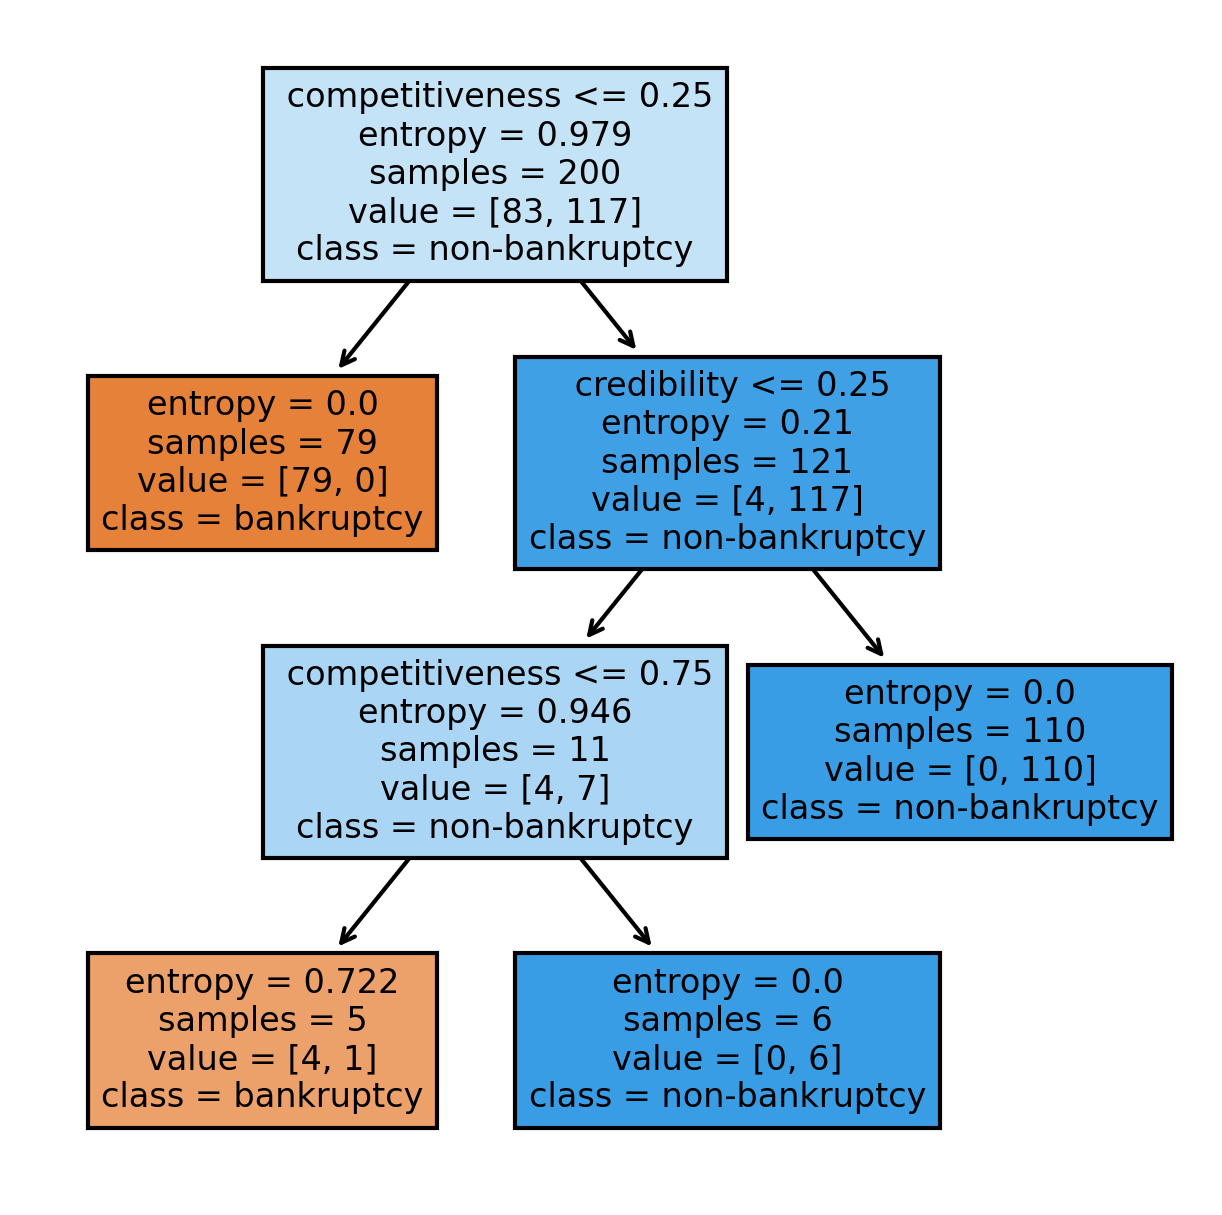

In [95]:
fn=[' financial_flexibility', ' credibility', ' competitiveness' ]
cn=['bankruptcy','non-bankruptcy'] 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Pipeline Generation

In [154]:
categ

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,Medium,High,Low,Low,Low,Medium
1,Low,High,Low,Low,Low,High
2,High,Low,Low,Low,Low,High
3,Medium,Low,Low,Medium,Low,High
4,High,High,Low,Low,Low,High
...,...,...,...,...,...,...
245,Low,High,High,High,High,High
246,High,High,Medium,High,High,Low
247,Low,High,High,Medium,Medium,Low
248,High,Low,Medium,High,Medium,Low


In [155]:
df_new=categ.drop(['industrial_risk',' management_risk',' operating_risk'] , axis=1)
df_new

,financial_flexibility,credibility,competitiveness
0,Low,Low,Low
1,Low,Low,Low
2,Low,Low,Low
3,Low,Medium,Low
4,Low,Low,Low
...,...,...,...
245,High,High,High
246,Medium,High,High
247,High,Medium,Medium
248,Medium,High,Medium


In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0,1,2]),
], remainder='passthrough')

In [157]:
model = Pipeline(steps=[('transformer', transformer),('model',DecisionTreeClassifier(criterion='entropy',max_depth=3))])

In [158]:
x_train,x_test,y_train,y_test = train_test_split(df_new, df1[' class'], test_size=0.2,random_state=1)

In [159]:
model.fit(x_train,y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3))])

In [160]:
y_pred = model.predict(x_test)

In [161]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0], dtype=int64)

In [162]:
import pickle

pickle.dump(model, open('model.pkl','wb'))